In [1]:
import pandas as pd
import scipy.cluster.hierarchy as model
import re
import numpy as np
import scipy.spatial.distance
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Task 1

Firstly let's create a list of strings to store all sentences and also create a dictionary to store a set of unique words from the txt file:

In [2]:
sentences = []
words = []
with open('words.txt') as f:
    for line in f:
        # Fill list wist each sentence, replacing unneeded characters and turning all to lowerspace
        sentences.append(line[:-1].replace(',', '').replace('.', '').replace('-', ' ').replace(')', '').replace('(', '').replace("'", ' ').lower())
        # Filter each line, splitting it by regular expressions and converting it to lowercase in order to compare all words
        line = list(filter(lambda x: len(x)>0, re.split('[^a-z]', line[:-1].lower())))
        words.append(line)
f.close()

# After reading the file we got a list of lists, which we need to flatten in order to create the set of unique words
flat_words = [x for word in words for x in word]
words = list(set(flat_words))

# Making the dictionary, where key is index and value is unique word itself
wordmap = dict(zip(range(len(words)), words))
wordmap

{0: 'the',
 1: 'artificial',
 2: 'received',
 3: 'computers',
 4: 'processors',
 5: 'streams',
 6: 'weighing',
 7: 'drive',
 8: 'factory',
 9: 'update',
 10: 'is',
 11: 'domestic',
 12: 'size',
 13: 'installation',
 14: 'felis',
 15: 'too',
 16: 'terms',
 17: 'three',
 18: 'enhancements',
 19: 'binary',
 20: 'installed',
 21: 'single',
 22: 'that',
 23: 'lion',
 24: 'useful',
 25: 'on',
 26: 'mac',
 27: 'files',
 28: 'frequency',
 29: 'selection',
 30: 'predators',
 31: 'catenates',
 32: 'safari',
 33: 'apple',
 34: 'to',
 35: 'other',
 36: 'without',
 37: 'rather',
 38: 'new',
 39: 'available',
 40: 'their',
 41: 'from',
 42: 'sequence',
 43: 'domestication',
 44: 'right',
 45: 'external',
 46: 'version',
 47: 'basic',
 48: 'mountain',
 49: 'time',
 50: 'pipes',
 51: 'its',
 52: 'kg',
 53: 'changes',
 54: 'may',
 55: 'if',
 56: 'those',
 57: 'genes',
 58: 'unnecessary',
 59: 'since',
 60: 'made',
 61: 'for',
 62: 'were',
 63: 'allows',
 64: 'default',
 65: 'comparison',
 66: 'used',
 

Next create a bag of words, which is actually a matrix that shows a number of occurances of unique words per sentence

In [3]:
wordlist = list(wordmap.values())
column_names = ['Sentences']
for i in wordlist:
    column_names.append(i)

# Nested loop to create 2-D matrix, which appears to be the bag of words
data = [] # Main list
for i in range(len(sentences)):
    data_filler = [] # Sublist to append list
    data_filler.append(sentences[i])
    for j in range(len(wordlist)):
        data_filler.append(sentences[i].split().count(wordlist[j])) #Count number of word occurances per each sentence
    data.append(data_filler)

Use pandas dataframe just to comfortably visualize the matrix

In [4]:
bagOfWords = pd.DataFrame(data, columns = column_names)
bagOfWords.head()

,Sentences,the,artificial,received,computers,processors,streams,weighing,drive,factory,...,sounds,high,undergone,redirection,purchase,genus,x,human,redirected,permanently
0,in comparison to dogs cats have not undergone ...,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,as cat simply catenates streams of bytes it ca...,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,a common interactive use of cat for a single f...,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,cats can hear sounds too faint or too high in ...,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,1,0,0
4,in one people deliberately tamed cats in a pro...,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Convert bag of words to numpy array and find the cosine distances of all sentences

In [5]:
calc_data = bagOfWords.iloc[:, 1:].to_numpy()
cos_distances = {}
for i in range(len(calc_data)):
    cos_distances[sentences[i]] = round(scipy.spatial.distance.cosine(calc_data[0], calc_data[i]), 3) # Apply cosine distance function

sorted(cos_distances.items(), key=lambda x:x[1])[1:3] # Sort dictionary and print 2 sentences with lowest distances

[('domestic cats are similar in size to the other members of the genus felis typically weighing between 4 and 5 kg 88 and 110 lb',
  0.733),
 ('in one people deliberately tamed cats in a process of artificial selection as they were useful predators of vermin',
  0.777)]

## Task 2

Let's create Term Frequency matrix by dividing each element(word occurance) by its sentence's length

In [6]:
tf = bagOfWords.copy()

for i in range(tf.shape[0]):
    filler_data = []
    sent_length = len(tf.iloc[i,:][0].split())
    for j in range(1, tf.shape[1]):
        filler_data.append(tf.iloc[i][j]/sent_length) # Nested loop, very similar to last one, but instead of counting occurances, we divide them by sentence's length
    tf.iloc[i, 1:] = filler_data # Update row value


tf.head()

,Sentences,the,artificial,received,computers,processors,streams,weighing,drive,factory,...,sounds,high,undergone,redirection,purchase,genus,x,human,redirected,permanently
0,in comparison to dogs cats have not undergone ...,0.071429,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.071429,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,as cat simply catenates streams of bytes it ca...,0.000000,0.000000,0.0,0.0,0.0,0.041667,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,a common interactive use of cat for a single f...,0.047619,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,cats can hear sounds too faint or too high in ...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.041667,0.041667,0.000000,0.0,0.0,0.0,0.0,0.041667,0.0,0.0
4,in one people deliberately tamed cats in a pro...,0.000000,0.052632,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


Then apply formula of Inverse Document Frequency

In [7]:
def count_nonzero(column): # A function to count nonzero values
    counter = 0
    for i in list(column):
        if i > 0:
            counter+=1
    return counter

idf = []

for i in range(1, tf.shape[1]): #A loop that checks if output of our function is equal to zero
    N = count_nonzero(tf.iloc[:, i])
    if N == 0:
        idf.append(N)
        continue
    idf.append(np.log10(tf.shape[1]/N)) # Due to value check above we avoided error that could occur because of division by 0
idf#non-Apple nonapple

[1.2304489213782739,
 2.406540180433955,
 2.406540180433955,
 2.1055101847699738,
 2.406540180433955,
 2.406540180433955,
 2.406540180433955,
 2.406540180433955,
 2.406540180433955,
 2.406540180433955,
 1.7075701760979363,
 2.406540180433955,
 2.406540180433955,
 2.1055101847699738,
 2.406540180433955,
 2.406540180433955,
 2.406540180433955,
 2.406540180433955,
 2.406540180433955,
 2.406540180433955,
 2.1055101847699738,
 2.406540180433955,
 2.1055101847699738,
 1.8044801891059927,
 2.406540180433955,
 1.7075701760979363,
 1.6283889300503116,
 2.406540180433955,
 2.406540180433955,
 2.406540180433955,
 2.406540180433955,
 2.406540180433955,
 2.406540180433955,
 1.5614421404196983,
 1.3273589343863303,
 2.1055101847699738,
 2.406540180433955,
 2.406540180433955,
 2.1055101847699738,
 2.406540180433955,
 2.406540180433955,
 2.406540180433955,
 2.1055101847699738,
 2.406540180433955,
 2.406540180433955,
 2.406540180433955,
 2.406540180433955,
 2.406540180433955,
 1.7075701760979363,
 2.40

Finally multiply every IDF element by its corresponding column form TF dataframe:

In [11]:
tf_idf = tf.copy() #create copy to avoid messing up with initial TF dataframe

for i in range(1, tf_idf.shape[1]): #simple loop to iterate through df and multiply values
    tf_idf.iloc[:, i] = tf_idf.iloc[:, i]*idf[i-1]
tf_idf.set_index('Sentences', inplace = True)
tf_idf.head()

,the,artificial,received,computers,processors,streams,weighing,drive,factory,update,...,sounds,high,undergone,redirection,purchase,genus,x,human,redirected,permanently
Sentences,,,,,,,,,,,,,,,,,,,,,
in comparison to dogs cats have not undergone major changes during the domestication process,0.087889,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.171896,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
as cat simply catenates streams of bytes it can be also used to concatenate binary files where it will just concatenate sequence of bytes,0.000000,0.00000,0.0,0.0,0.0,0.100273,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
a common interactive use of cat for a single file is to output the content of a file to standard output,0.058593,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
cats can hear sounds too faint or too high in frequency for human ears such as those made by mice and other small animals,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.100273,0.100273,0.000000,0.0,0.0,0.0,0.0,0.08773,0.0,0.0
in one people deliberately tamed cats in a process of artificial selection as they were useful predators of vermin,0.000000,0.12666,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0


## Task 3

Dendrogram of bag of words

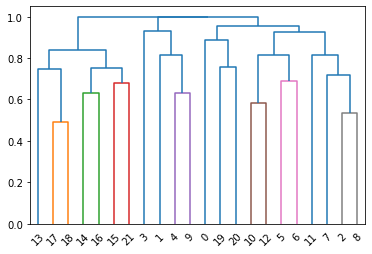

In [9]:
BOW_dend = model.dendrogram(model.linkage((calc_data), method='complete', metric = 'cosine'), labels=range(0, 22))

Dendrogram of TF-IDF matrix

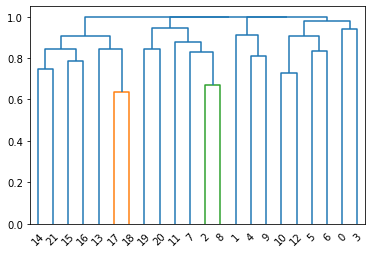

In [10]:
TFIDF_dend = model.dendrogram(model.linkage((tf_idf.to_numpy()), method='complete', metric = 'cosine'), labels=range(0, 22))